In [319]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

RANGE_LOW = -10
RANGE_HIGH = 10

# 生成数据
def generate_data(n):
    data = np.zeros((2*n, 2), dtype=np.float64)
    labels = np.zeros(2*n)

    j = 0
    # 生成正例
    for i in range(n):
        a = np.random.randint(RANGE_LOW, RANGE_HIGH)
        b = np.random.randint(RANGE_LOW, RANGE_HIGH)
        data[i] = [a, b]
        labels[i] = a+b
        j = j +1

    # 生成反例
    for k in range(2*n):
        a = np.random.randint(RANGE_LOW, RANGE_HIGH)
        b = np.random.randint(RANGE_LOW, RANGE_HIGH)
        data[k] = [a, b]
        labels[k] = a + b + np.random.randint(-2, 2)

    return data, labels


# 创建模型
def createModel(units):

    class ANN(nn.Module):

        def __init__(self):
            super().__init__()
            self.input = nn.Linear(2, units)
            self.output = nn.Linear(units, 1)

        def forward(self, x):
            x = F.relu(self.input(x))
            x = self.output(x)
            return x

    model = ANN()
    loss = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=.05)
    return model, loss, optimizer

# 训练模型
def trainTheModel(epochs, model, loss, optimizer, data_t, labels):

    totalAcc = torch.zeros(epochs)
    _loss = torch.zeros(epochs)
    for i in range(epochs):
        yHat = model(data_t)
        lossess = loss(yHat, torch.tensor(labels, dtype=torch.float32))
        _loss[i] = lossess
        optimizer.zero_grad()
        lossess.backward()
        optimizer.step()

    predictions = model(data_t)
    return _loss, predictions


def showAcc(accs):
    fig, ax = plt.subplots(1, 2, figsize=(12, 1))
    ax[0].plot(accs.detach(), 'o')
    ax[0].set_title("losses")
    ax[0].set_xlabel("epoch")
    ax[0].set_ylabel("loss")


# 分割数据
def prepare_data(data, labels, train_rate=.8):
    indexs = np.linspace(0, 100, 100, dtype=np.int64)
    indexs = np.delete(indexs, 1)
    l =len(data)
    l = int(l * train_rate)
    train_data =data[0:l]
    train_labels = labels[0:l]

    test_data = data[l:]
    test_labels= labels[l:]

    return  train_data,test_data,train_labels,test_labels


[  1.  15.   3.  16.  -3.   0.  -1. -11. -10.  12. -10.  -6.   9.  -7.
   9.  10.  -9. -10.   4.  -9.  -1. -13.   6.  -2.   1.  -2. -10. -13.
   4.   4.  13.   5.  14.   3.  -5.  -2.   1.   6.  16.   2.  -5. -16.
 -10. -12.   6.  -3.   4.   0.  -3.   1.   0.  -2.   6.  -5.   8.  -2.
 -12.  -1.  -2. -18.   7.  12. -10.   1. -19.   4.   9. -17.  -9.   9.
 -13.  -9.  -8.   7.   2.  -8. -13.  -4. -14.   9.  -7.   0.  -8.  -2.
  12.  -9.   6. -11.  -9.   0.   4.  -4.   7.  -1.  -2.   1.  -3.   6.
  11.  -4.]


/Users/ouyuan/Library/Python/3.9/lib/python/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


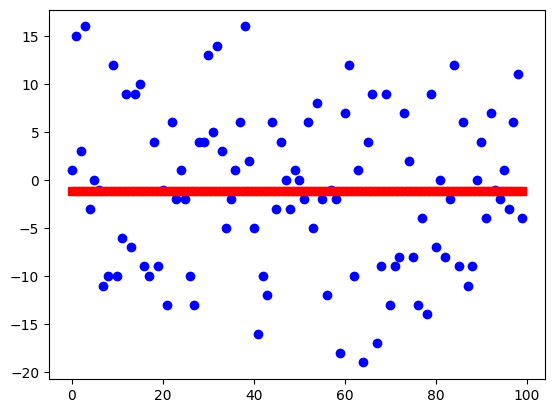

In [324]:
data,labels = generate_data(100)
print(labels)

data_t =torch.tensor(data).float()
model,loss,optimizer = createModel(4)

_loss,predictions= trainTheModel(10000,model,loss,optimizer,data_t,labels)

def showLoss(losses):
    plt.plot(losses.detach(),'o')      

def showData(labels,predictions):
    plt.plot(labels,'bo', label="true")
    plt.plot(predictions.detach(),'rs',label='Predictions')
    plt.show()
    

# showLoss(_loss)

showData(labels,predictions)

